In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns
from utilities import deets
%load_ext autoreload
%autoreload 2

In [54]:
df = (
    pd.read_csv('../../not_on_git/final_classification/all_classified.csv')
    .set_index('name')
    .query('prob>.9999')
    )
df

,significance,var_flag,streak_src_flag,pileup_flag,ra,dec,missing,sat_src_flag,extent_flag,conf_flag,...,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2,0p3_8_csc,24_microns_(MIPS)
name,,,,,,,,,,,,,,,,,,,,,
2CXO J012125.0-725827,10.584334,0,0,0,20.354232,-72.974249,0.389831,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3.250784,3.518963,5.990373,NaN,NaN
2CXO J143022.6+311158,5.257143,0,0,0,217.594350,31.199564,0.338983,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.159988,NaN,NaN
2CXO J143521.3+305719,2.722222,0,0,0,218.838875,30.955351,0.372881,0,0,0,...,NaN,4.965573,NaN,8.879777,NaN,NaN,NaN,7.183212,NaN,NaN
2CXO J143541.0+305954,2.166667,0,0,0,218.921038,30.998396,0.423729,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.692142,NaN,NaN
2CXO J164748.4-454409,2.888889,0,0,0,251.951747,-45.736101,0.542373,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3.058110,3.568559,5.782207,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J005214.7+473701,32.844842,1,0,0,13.061293,47.617120,0.322034,0,0,0,...,1.600025,NaN,1.680749,NaN,9.828926,3.021473,NaN,NaN,0.066774,0.002154
2CXO J094732.5+071827,3.230769,1,0,0,146.885695,7.307509,0.372881,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002615,NaN
2CXO J094741.9+073307,13.728778,1,0,0,146.924694,7.551989,0.237288,0,0,0,...,NaN,3.889395,NaN,4.866196,NaN,NaN,NaN,6.208020,0.027493,NaN


In [55]:
deets(df,1)

_____________________________________________________
------------------------------
Number of Objects : 14066
Number of Columns : 64
------------------------------


AGN     8574
STAR    5166
YSO      208
LMXB      71
HMXB      46
CV         1
Name: class, dtype: int64

_____________________________________________________


In [56]:
from utilities import plot_feat_feat , get_true_data

In [82]:
true_df = get_true_data(df[['prob' , 'class']])
filters = ['b' , 'm' , 's' , 'h' , 'u']
# for f in filters:
#     true_df = true_df[true_df[f'{f}-csc']>0]
for f in filters:
    true_df[f'{f}-mag'] = [np.nan]*len(true_df)
    true_df.loc[true_df[f'{f}-csc']>0 , f'{f}-mag'] = -np.log10(true_df.loc[true_df[f'{f}-csc']>0][f'{f}-csc'])
true_df['m-h'] = true_df['m-mag'] - true_df['h-mag']
true_df['h-s'] = true_df['h-mag'] - true_df['s-mag']
true_df['m-s'] = true_df['m-mag'] - true_df['s-mag']
true_df['b-mag']

name
2CXO J012125.0-725827    12.841708
2CXO J143022.6+311158    13.870896
2CXO J143521.3+305719    13.759100
2CXO J143541.0+305954    13.926538
2CXO J164748.4-454409    14.512757
                           ...    
2CXO J005214.7+473701    13.161268
2CXO J094732.5+071827    14.430361
2CXO J094741.9+073307    13.276687
2CXO J060212.5-395227    14.554283
2CXO J060233.7-395610    13.859865
Name: b-mag, Length: 14066, dtype: float64

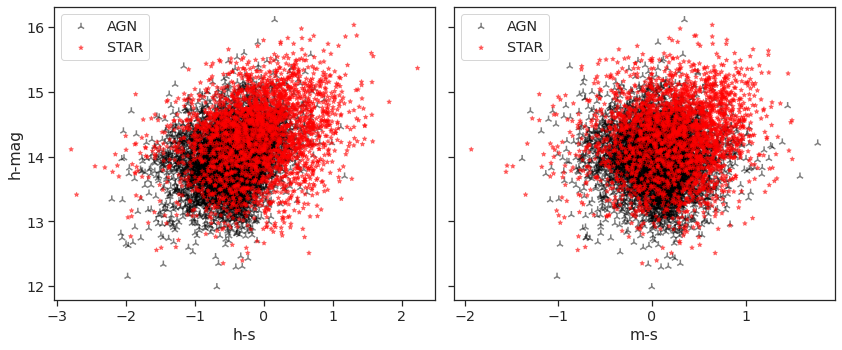

In [84]:
from utilities import plot_feat_feat
fig , ax =  plt.subplots(nrows=1 , ncols=2 , figsize=(14,6) , sharey='row')
x1 = 'h-s'
x2 = 'm-s'
y = 'h-mag'
plot_feat_feat(true_df, x1,y , ax=ax[0] , cl=['AGN' ,'STAR'])
plot_feat_feat(true_df, x2,y , ax=ax[1] , cl=['AGN' ,'STAR'])
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel(x1)
ax[0].set_ylabel(y)
ax[1].set_xlabel(x2)
#ax[0].set_xticklabels(rotation = 45, ha="right")
plt.subplots_adjust(wspace=0.05, hspace=0 , bottom=0.2)
plt.legend()
#plt.gcf().subplots_adjust(bottom=0.2)
#plt.savefig(f'{img_loc}feat-1.jpg' , format='jpg')
plt.show()

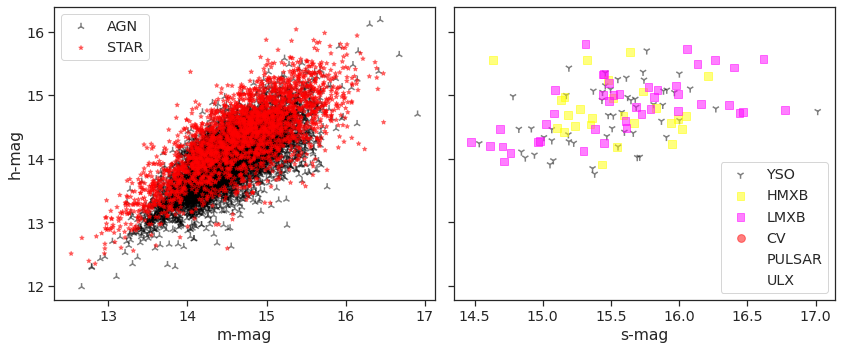

In [81]:
from utilities import plot_feat_feat
fig , ax =  plt.subplots(nrows=1 , ncols=2 , figsize=(14,6) , sharey='row')
x1 = 'm-mag'
x2 = 's-mag'
y = 'h-mag'
plot_feat_feat(true_df, x1,y , ax=ax[0] , cl=['AGN' ,'STAR'])
plot_feat_feat(true_df, x2,y , ax=ax[1] , cl = ['YSO' , 'HMXB' , 'LMXB' , 'CV' , 'PULSAR' , 'ULX'])
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel(x1)
ax[0].set_ylabel(y)
ax[1].set_xlabel(x2)
#ax[0].set_xticklabels(rotation = 45, ha="right")
plt.subplots_adjust(wspace=0.05, hspace=0 , bottom=0.2)
plt.legend()
#plt.gcf().subplots_adjust(bottom=0.2)
#plt.savefig(f'{img_loc}feat-1.jpg' , format='jpg')
plt.show()